In [6]:
#from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
#librerias para el desarrollo del proyecto
import matplotlib.pyplot as plt #libreria para graficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import seaborn as sb
import numpy as np

#librerias pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

#enlazando los datos en el archivo excel
data = pd.read_csv('./data/diabetes.csv')
#invocando a la libreria de clasificacion
from sklearn.tree import DecisionTreeClassifier 

In [7]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Asignando valores

In [8]:
data_as_array = np.array(data)
data_as_array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
X = data_as_array[:,:8]
X.shape

(768, 8)

In [10]:
Y = data_as_array[:,8:]
Y = Y.reshape(768,)
Y.shape

(768,)

In [11]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


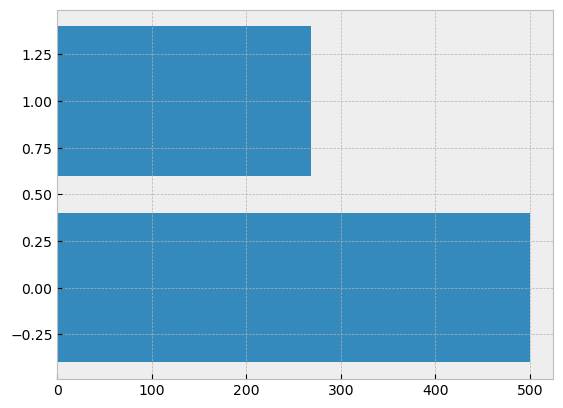

<Figure size 500x300 with 0 Axes>

In [12]:
conteo = data['Outcome'].value_counts()
plt.style.use("bmh") 
plt.barh(conteo.index,conteo)
plt.figure(figsize=(5, 3))
plt.show()

# Balancear Datos

In [13]:
from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, Y_over = oversample.fit_resample(X, Y)
X_over1, Y_over1 = oversample.fit_resample(X_over, Y_over)
X_over2, Y_over2 = oversample.fit_resample(X_over1, Y_over1)
X_over3, Y_over3 = oversample.fit_resample(X_over2, Y_over2)

# summarize class dis

print(Counter(Y_over3))

Counter({1.0: 500, 0.0: 500})


# Particionamiento de la data

In [14]:
#particionando la data en 0.8 para entrenar y 0.2 para validar
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_over3,Y_over3, test_size=0.2, random_state=0)

print(X_trainset.shape, y_trainset.shape)
print (X_testset.shape, y_testset.shape)

(800, 8) (800,)
(200, 8) (200,)


In [15]:
#entrenando vecinos cercanos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
neighbors = 11

In [16]:
# get a list of models to evaluate
def get_models():
 models = dict()
 #models['rf'] = RandomForestClassifier()
 models['knn'] = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
 models['cart'] = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)
 models['grad'] = GradientBoostingClassifier(learning_rate=0.1, max_depth=8, min_samples_leaf=20)
 #models['bayes'] = GaussianNB(var_smoothing=4.328761281083062e-05)
 models['svm'] = SVC(C=1, gamma=1, kernel='rbf')
 return models

In [17]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X_trainset,y_trainset, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

>knn 0.798 (0.046)
>cart 0.751 (0.044)
>grad 0.835 (0.038)
>svm 0.828 (0.040)


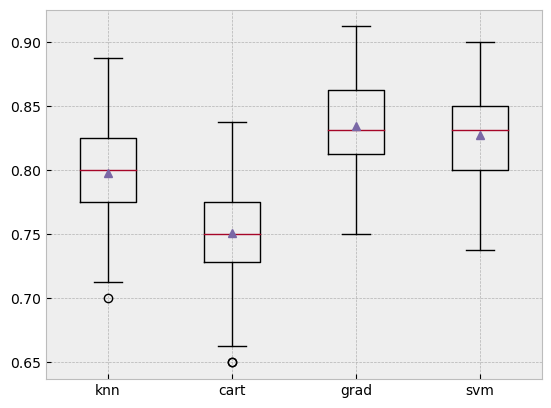

In [18]:
from statistics import mean
# define dataset
#X, Y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
 scores = evaluate_model(model, X_trainset, y_trainset)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Añadir un asemble

In [19]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# define the base models
level0 = list()
#level0.append(('rf', RandomForestClassifier()))
level0.append(('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')))
level0.append(('cart', DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)))
level0.append(('gradien', GradientBoostingClassifier(learning_rate=0.1, max_depth=8, min_samples_leaf=20)))
#level0.append(('bayes', GaussianNB(var_smoothing=4.328761281083062e-05)))
level0.append(('svm', SVC(C=0.1, gamma=1, kernel='rbf')))
# define meta learner model
level1 = RandomForestClassifier(max_depth=None, max_features='sqrt', max_leaf_nodes=None, n_estimators=100)

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_trainset,y_trainset)
# fit the model on all available data
pred_train = model.predict(X_trainset)
pred_test = model.predict(X_testset)

# Métricas del Modelo (Train)

In [20]:
#Metricas del modelo
from sklearn.metrics import accuracy_score
print('la precision es :',accuracy_score(y_trainset, pred_train))

#Recall - sensibilidad
from sklearn.metrics import recall_score
print ('la sensibilidad es : ',recall_score(y_trainset, pred_train, average='macro'))

#f1_score
from sklearn.metrics import f1_score
print('el f1_score es: ', f1_score(y_trainset, pred_train, average='macro'))

#precision
from sklearn.metrics import precision_score
print('la precision es :',precision_score(y_trainset, pred_train, average='macro'))

la precision es : 0.9925
la sensibilidad es :  0.9924050632911392
el f1_score es:  0.9924969987995198
la precision es : 0.9927007299270073


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_trainset, pred_train))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       395
         1.0       0.99      1.00      0.99       405

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [22]:
matrix_de_confussion_stacking = pd.crosstab(y_trainset, pred_train, rownames = ['ACTUAL'],colnames=['PREDICCION'])
#print(matriz_de_confusion)
print(matrix_de_confussion_stacking)

PREDICCION  0.0  1.0
ACTUAL              
0.0         389    6
1.0           0  405


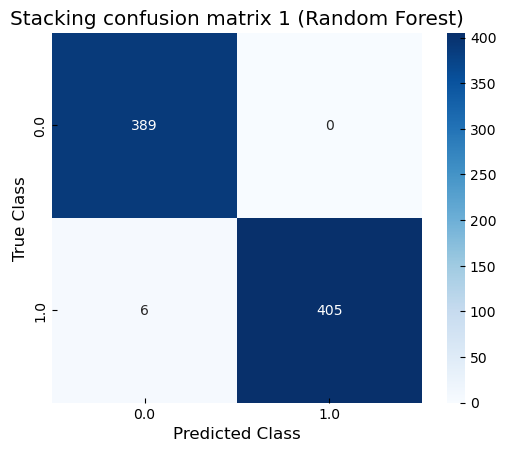

In [23]:
cnf_matrix= pd.crosstab(y_trainset, pred_train, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=True, cmap ='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking confusion matrix 1 (Random Forest)')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

# Métricas del Modelo (Test)

In [24]:
#Metricas del modelo
from sklearn.metrics import accuracy_score
print('la precision es :',accuracy_score(y_testset, pred_test))

#Recall - sensibilidad
from sklearn.metrics import recall_score
print ('la sensibilidad es : ',recall_score(y_testset, pred_test, average='macro'))

#f1_score
from sklearn.metrics import f1_score
print('el f1_score es: ', f1_score(y_testset, pred_test, average='macro'))

#precision
from sklearn.metrics import precision_score
print('la precision es :',precision_score(y_testset, pred_test, average='macro'))

la precision es : 0.875
la sensibilidad es :  0.8724310776942357
el f1_score es:  0.8738616009485607
la precision es : 0.8789269685842513


In [25]:
print(classification_report(y_testset, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89       105
         1.0       0.91      0.82      0.86        95

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



In [26]:
matrix_de_confussion_stacking = pd.crosstab(y_testset, pred_test, rownames = ['ACTUAL'],colnames=['PREDICCION'])
print(matrix_de_confussion_stacking)

PREDICCION  0.0  1.0
ACTUAL              
0.0          97    8
1.0          17   78


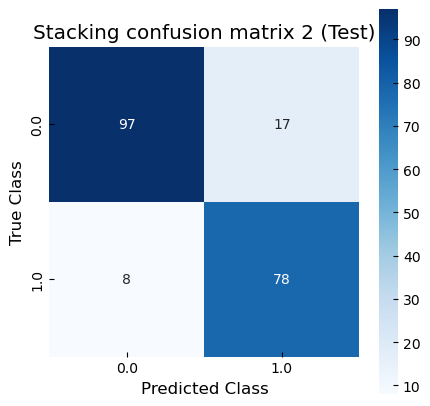

In [27]:
cnf_matrix= pd.crosstab(y_testset, pred_test, rownames = ['ACTUAL'],colnames=['Prediccion'])
sb.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=True, cmap ='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking confusion matrix 2 (Test)')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

# ROC Curve (Train)

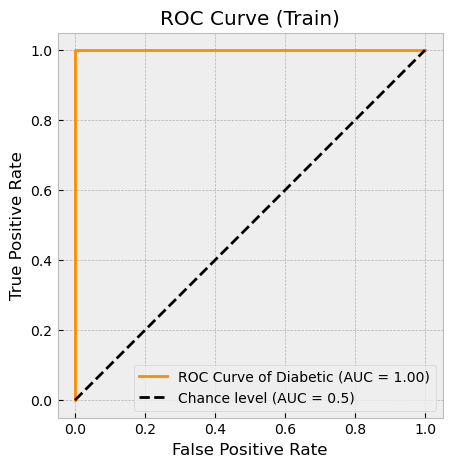

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from itertools import cycle

probs = model.predict_proba(X_trainset)
probs = probs[:,1]

RocCurveDisplay.from_predictions(
    y_trainset,
    probs,
    name="ROC Curve of Diabetic",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Train)")
plt.legend()
plt.show()

# ROC Curve (Test)

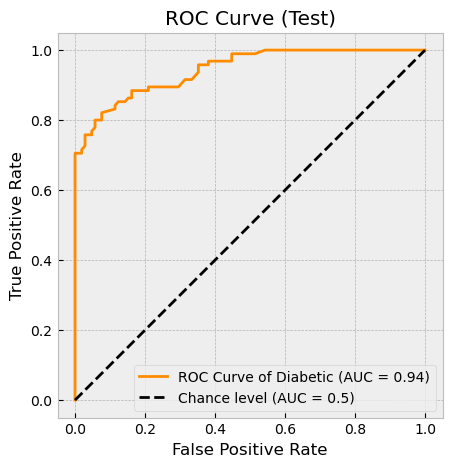

In [30]:
probs = model.predict_proba(X_testset)
probs = probs[:,1]

RocCurveDisplay.from_predictions(
    y_testset,
    probs,
    name="ROC Curve of Diabetic",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend()
plt.show()

In [31]:
import pickle

In [32]:
pickle.dump(model, open('./models/stacking_rf_oversampling_hp.pkl', 'wb'))

In [33]:
!pip list

Package                            Version
---------------------------------- ---------------
absl-py                            1.4.0
adal                               1.2.7
aiohttp                            3.9.3
aiosignal                          1.3.1
alabaster                          0.7.12
altair                             4.1.0
anaconda-client                    1.11.0
anaconda-navigator                 2.4.0
anaconda-project                   0.11.1
anyascii                           0.3.2
anyio                              3.5.0
appdirs                            1.4.4
argcomplete                        2.0.0
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              1.2.2
asn1crypto                         1.5.1
astroid                            2.11.7
astropy                            5.1
astunparse                         1.6.3
async-generator                    1.10
